这个代码用来绘制图象以及进行一些分析

In [18]:
import numpy as np
import pandas as pd
import torch
from torchviz import make_dot
from Resnet import ResidualBlock, ResNet
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
train_acc = pd.read_csv('Log/train_acc.csv')
val_acc = pd.read_csv('Log/val_acc.csv')
train_loss = pd.read_csv('Log/train_loss.csv')
val_loss = pd.read_csv('Log/val_loss.csv')

In [20]:
train_acc.head()

,Wall time,Step,Value
0,1.764738e+09,0,39.050980
1,1.764738e+09,1,35.876884
2,1.764738e+09,2,40.301380
3,1.764738e+09,3,43.699905
4,1.764738e+09,4,46.617504


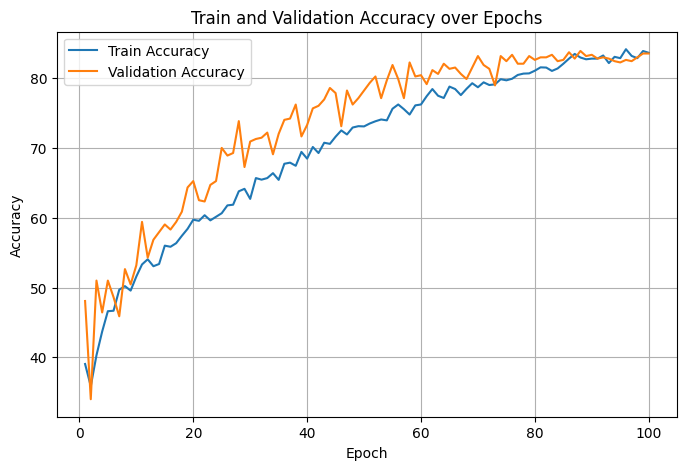

In [21]:
# 把训练和验证的准确率画在同一个图上
plt.style.use('default')
plt.figure(figsize=(8, 5))
plt.plot(train_acc['Step'] + 1, train_acc['Value'], label='Train Accuracy')
plt.plot(val_acc['Step'] + 1, val_acc['Value'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('Figure/accuracy_plot.png', dpi=200)

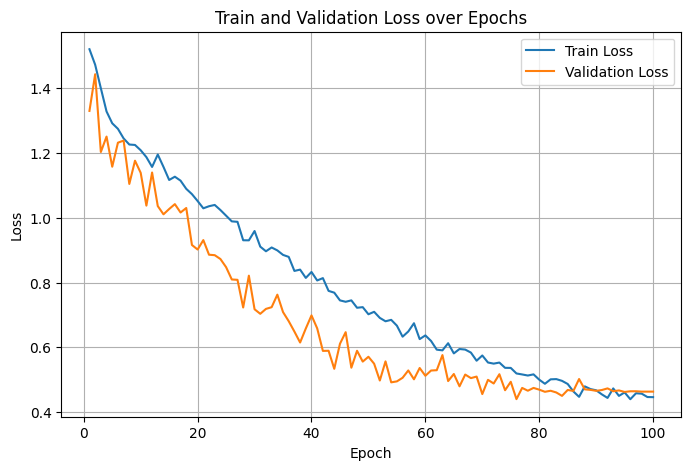

In [22]:
# 把训练和验证的损失画在同一个图上
plt.style.use('default')
plt.figure(figsize=(8, 5))
plt.plot(train_loss['Step'] + 1, train_loss['Value'], label='Train Loss')
plt.plot(val_loss['Step'] + 1, val_loss['Value'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('Figure/loss_plot.png', dpi=200)

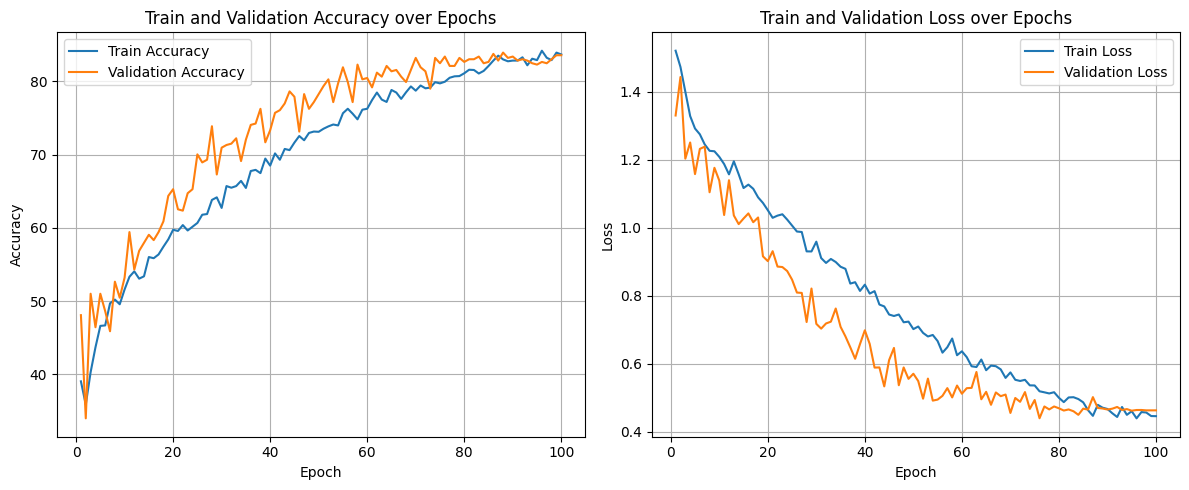

In [23]:
# 两张图并排显示
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
palette = sns.color_palette("tab10", 2)

axs[0].clear()
axs[0].plot(train_acc['Step'] + 1, train_acc['Value'], label='Train Accuracy', color=palette[0])
axs[0].plot(val_acc['Step'] + 1, val_acc['Value'], label='Validation Accuracy', color=palette[1])
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Train and Validation Accuracy over Epochs')
axs[0].legend()
axs[0].grid()

axs[1].clear()
axs[1].plot(train_loss['Step'] + 1, train_loss['Value'], label='Train Loss', color=palette[0])
axs[1].plot(val_loss['Step'] + 1, val_loss['Value'], label='Validation Loss', color=palette[1])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Train and Validation Loss over Epochs')
axs[1].legend()
axs[1].grid()

fig.tight_layout()
# plt.show()
plt.savefig('Figure/accuracy_loss_plot.png', dpi=200)

In [24]:
model_path = 'Model/resnet_model.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_instance = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes=5).to(device)
state_dict = torch.load(model_path, map_location=device)
model_instance.load_state_dict(state_dict)
total_params = sum(p.numel() for p in model_instance.parameters())
print(f'Total number of parameters in the model: {total_params:}')

Total number of parameters in the model: 21287237
